# HW 1 - GROUP 4

### Team members - Jingwen Li, Elie Kostenbaum, Moushumi Pardesi

In [21]:
import os
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [14]:
os.chdir('/Users/moush/Desktop/UChicago FINM/Econ/Asn1')
df = pd.read_csv('MSCI_sample.CSV')
df['AS_OF_DATE'] =pd.to_datetime(df['AS_OF_DATE'])
df_rf = pd.read_csv('F-F_Research_Data_Factors.CSV')
df_rf.set_index('date', inplace=True)
df.head()

,ISSUER_NAME,ISSUERID,AS_OF_DATE,IVA_INDUSTRY,INDUSTRY_ADJUSTED_SCORE,WEIGHTED_AVERAGE_SCORE,ENVIRONMENTAL_PILLAR_SCORE,ENVIRONMENTAL_PILLAR_WEIGHT,SOCIAL_PILLAR_SCORE,SOCIAL_PILLAR_WEIGHT,GOVERNANCE_PILLAR_SCORE,GOVERNANCE_PILLAR_WEIGHT,RET,PRC,SHROUT
0,"QEP Resources, Inc.",IID000000002231971,2012-01-01,Oil & Gas Exploration & Production,4.55,6.00,4.70,56.00,7.40,22.00,7.90,22.00,-0.022526,NaN,242566.0
1,IAMGOLD Corporation,IID000000002169868,2012-01-01,Metals and Mining - Precious Metals,4.66,5.97,6.12,55.25,6.14,25.00,5.36,19.75,0.056151,3.48,477033.0
2,Las Vegas Sands Corp.,IID000000002173531,2012-01-01,Casinos & Gaming,0.00,5.89,5.29,38.00,6.70,32.00,5.80,30.00,0.149310,38.87,763990.0
3,Honeywell International Inc.,IID000000002127578,2012-01-01,Aerospace & Defense,5.64,5.83,4.09,45.00,6.60,25.00,7.80,30.00,0.067893,194.58,685894.0
4,"Staples, Inc.",IID000000002145070,2012-01-01,Specialty Retail,6.10,5.81,7.02,24.65,5.42,70.79,5.30,4.56,0.053276,NaN,656713.0


In [15]:
df_rf.head()

,Mkt-RF,SMB,HML,RF
date,,,,
192607,2.96,-2.56,-2.43,0.22
192608,2.64,-1.17,3.82,0.25
192609,0.36,-1.4,0.13,0.23
192610,-3.24,-0.09,0.7,0.32
192611,2.53,-0.1,-0.51,0.31


## 1 ESG (40 points)

### 1. 

The file MSCI sample.csv contains MSCI ESG ratings for a random sample of firms. Following equations 1 and 2 of Pástor et al. (2022), compute the firm-level greenness measure, $ g_{i,t} $. In order to do the value-weighting (this will also apply when you construct the GMB portfolio), use the fields PRC (price) and SHROUT (shares outstanding) to compute the market cap of each firm at each date. Then, $\overline{G}$ is the market cap weighted average. You do not need to report anything at this step, but will need to use this measure later.

In [19]:
#calc mkt cap
df["MKTCAP"] = df["PRC"] * df["SHROUT"]
#calc unadjusted green score
df['G'] = -(10 - df['ENVIRONMENTAL_PILLAR_SCORE']) * df['ENVIRONMENTAL_PILLAR_WEIGHT'] / 100
#calc wgts
df['MKTCAP_SUM']=df.groupby("AS_OF_DATE")["MKTCAP"].transform('sum')
df['WGT']=df['MKTCAP']/df['MKTCAP_SUM']
'''
calc return
df_sorted = df.sort_values(['ISSUERID', 'AS_OF_DATE'])
df_sorted['RETURN'] = df_sorted.groupby('ISSUERID')['PRC'].pct_change()
#calc weighted return
df_sorted['WGT_RETURN']=df_sorted['RETURN']*df_sorted['WGT']
'''

#### (a) (5 points) 
In your own words, explain what the unadjusted greenness score, $G_{i,t}$, measures. Make sure to mention why we need to include 
$E_{weight}$.

#### Answer: 
The unadjusted greenness score, $G_{i,t}$, is a measure of the environmental performance of a company i at time t. It is calculated as a weighted sum of the company's scores on a set of environmental indicators, such as greenhouse gas emissions, water pollution, and waste production. The weights reflect the relative importance of each indicator.

$E_{weight}$ allows us to account for the different environmental impacts of different industries. By including $E_{weight}$, we can ensure that companies in different industries are compared on an apple to apple basis. Additionally, $E_{weight}$ allows us to account for the different levels of environmental regulation in different countries and regions. It allows that companies in different countries and regions are compared on an equal footing.

#### (b) (5 points) 
Why does the paper focus on the adjusted greenness score?
#### Answer
$G_{i,t}$ is a more accurate measure of a firm's environmental performance than raw greenness score because raw score does not take into account the size of the firm or the industry in which it operates. $G_{i,t}$ does take these factors into account, making it a more reliable measure of a firm's environmental performance. $G_{i,t}$ is more useful for investors who are looking to identify companies with good environmental performance because it lets investors to compare companies of different sizes and from different industries on an equal footing.

### 2. (10 points) 
Use the description in Section 4 of the paper to replicate Figure 3.

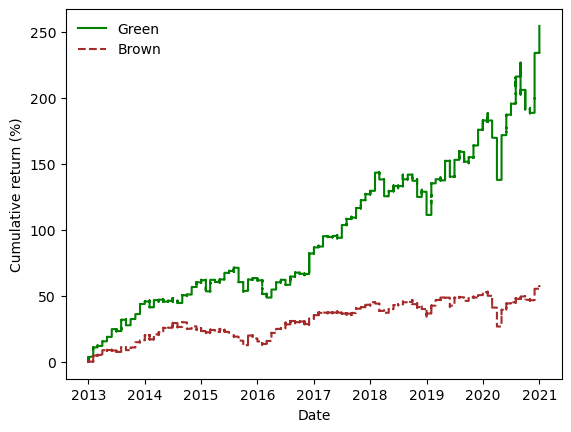

In [24]:
##calc return
df_sorted = df.sort_values(['ISSUERID', 'AS_OF_DATE'])
df_sorted['RETURN'] = df_sorted.groupby('ISSUERID')['PRC'].pct_change()
df_sorted = df_sorted.sort_values('AS_OF_DATE').tail(len(df_sorted) - 1807)
df_sorted = df_sorted.sort_values('AS_OF_DATE').head(len(df_sorted) - 5669)

## calc percentile greennest brownest stocks
df_sorted['AS_OF_DATE'] = pd.to_datetime(df_sorted['AS_OF_DATE'])
df_sorted['G_low'] = (df_sorted.groupby(df_sorted['AS_OF_DATE'].
                                        dt.to_period('M'))['G'].
                      transform(lambda x: x.quantile(1 / 3 - 0.002565)))
df_sorted['G_high'] = (df_sorted.groupby(df_sorted['AS_OF_DATE'].
                                         dt.to_period('M'))['G'].
                       transform(lambda x: x.quantile(2 / 3)))
df_sorted['total_cap'] = (df_sorted.groupby(df_sorted['AS_OF_DATE'].
                                            dt.to_period('M'))['MKTCAP'].transform('sum'))

## calc green stocks
df_sorted['delta'] = df_sorted['G'] - df_sorted['G_high']
green = df_sorted[df_sorted['delta'] > 0]

## calc brown stocks
df_sorted['delta'] = df_sorted['G_low'] - df_sorted['G']
brown = df_sorted[df_sorted['delta'] >= 0]

## calc weighted return
green['value_weight'] = green['MKTCAP'] / green['total_cap']
green['return_weighted'] = green['RETURN'] * green['value_weight']
brown['value_weight'] = brown['MKTCAP'] / brown['total_cap']
brown['return_weighted'] = brown['RETURN'] * brown['value_weight']
green['Green'] = ((green['return_weighted'] + 1).cumprod() - 1)
brown['Brown'] = ((brown['return_weighted'] + 1).cumprod() - 1)
green['date'] = green['AS_OF_DATE']
brown['date'] = brown['AS_OF_DATE']

#set graph specs
y = green['Green'] * 12 * 12 * 2
z = brown['Brown'] * 12 * 12 * 2
X = green['date']

plt.plot(X, y, color='green', label='Green')
plt.plot(X, z, color='brown', label='Brown', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Cumulative return (%)")
plt.legend(loc='upper left', frameon=False)
plt.show()


### 3. (10 points) 
What is the monthly return and Sharpe ratio of the green minus brown portfolio?

In [52]:
green['return_weighted'] = green['return_weighted'] + 1
green['CUM'] = green.groupby('AS_OF_DATE')['return_weighted'].cumprod()
brown['return_weighted'] = brown['return_weighted'] + 1
brown['CUM'] = brown.groupby('AS_OF_DATE')['return_weighted'].cumprod()
green['cum_max'] = green.groupby('date')['CUM'].transform('max')
green_monthly_returns = green.groupby('date')['CUM'].last()
green_monthly_returns = green_monthly_returns.to_frame()
green_array = green_monthly_returns[['CUM']].values
brown['cum_max'] = brown.groupby('date')['CUM'].transform('max')
brown_monthly_returns = brown.groupby('date')['CUM'].last()
brown_monthly_returns = brown_monthly_returns.to_frame()
brown_array = brown_monthly_returns[['CUM']].values
rf_array = df_rf[['RF']].values
rf_array = rf_array[:97]
rf_array = [float(x) for x in rf_array]
green_excess = [(green_array - 1) * 100 - rf_array]
brown_excess = [(brown_array - 1) * 100 - rf_array]
green_minus_brown = np.subtract(green_excess, brown_excess)
Sharpe_green_minus_brown = np.mean(green_minus_brown) / (np.std(green_minus_brown))
Sharpe_green = np.mean(green_excess) / (np.std(green_excess))
Sharpe_brown = np.mean(brown_excess) / (np.std(brown_excess))
print("Monthly return: ", np.mean(green_minus_brown))
print("Sharpe_green_minus_brown: ", np.mean(green_minus_brown) / (np.std(green_minus_brown)) )

Monthly return:  6.284676470071088e+209
Sharpe_green_minus_brown:  0.0


### 4. (10 points) 
How does Pástor et al. (2022) explain that green stocks outperform bad stocks when the theoretical model from Pástor et al. (2021) suggests that brown stocks should outperform? Make sure to focus on the distinction between expected and realized returns.

#### Answer
Short-term outperformance of green stocks is due to a change in investor preferences, which leads to a change in realized returns.

Brown stocks have a higher expected return than green stocks because they are more likely to generate cash flows in the near term. However, green stocks can outperform brown stocks in the short term if there is a sudden increase in public concern about climate change. This can drive up their prices, even though their expected returns are lower than those of brown stocks.

Over the long term, brown stocks are expected to outperform green stocks, due to their higher expected returns.

## 2 Climate Risk (60 points)

The first two parts of this problem are just to give you a chance to explore the industry returns data. The third part is specifically related to climate risk.

### 1 (5 points) 
The file 49_Industry_Portfolios.csv contains monthly returns of stocks in 49 different industries. Import this file into your program of choice. Restrict the sample to start in January 2004 and end in June 2018. Calculate the cumulative return of each industry over the sample period. Which were the three highest and three lowest performing industries in this sample?

In [86]:
df = pd.read_csv('49_Industry_Portfolios.CSV', skiprows=11) 

def process_table(data):
    data = data.rename(columns ={'Unnamed: 0':'Date'})
    data.set_index('Date', inplace=True)
    for col in data.columns:
        data[col] = data[col].astype(float)
    data = data.replace([-99.99, -999], float('nan')) 
    return data

avg_value_weighted_return_M = process_table(df.iloc[:1154])
avg_equal_weighted_return_M = process_table(df.iloc[1157:2310])

avg_value_weighted_return_Y = process_table(df.iloc[2313:2407])
avg_equal_weighted_return_Y = process_table(df.iloc[2411:2504])

num_of_firms_in_port = process_table(df.iloc[2507:3660])
avg_firm_size = process_table(df.iloc[3663:4816])
sum_of_BE_over_sum_of_ME = process_table(df.iloc[4819:4915])
value_weighted_average_of_BE_over_ME = process_table(df.iloc[4918:5014])

In [87]:
avg_value_weighted_return_M=avg_value_weighted_return_M.reset_index()
avg_value_weighted_return_M['Date'] = pd.to_datetime(avg_value_weighted_return_M['Date'], format='%Y%m')
start_date = pd.to_datetime('2004-01-01')
end_date = pd.to_datetime('2018-06-01')
filtered_df = avg_value_weighted_return_M[(avg_value_weighted_return_M['Date'] >= start_date) & (avg_value_weighted_return_M['Date'] <= end_date)]
avg_value_weighted_return_M = filtered_df.drop(['Date'], axis=1) 
cumulative_returns = (1 + avg_value_weighted_return_M / 100).cumprod() - 1
average_returns = cumulative_returns.mean()
top_3_industries = average_returns.nlargest(3)
bottom_3_industries = average_returns.nsmallest(3)

print("Three highest performing industries:")
print(top_3_industries)

print("\nThree lowest performing industries:")
print(bottom_3_industries)


Three highest performing industries:
Ships    2.958874
Smoke    2.858319
Guns     2.001190
dtype: float64

Three lowest performing industries:
Books   -0.146192
Gold    -0.126099
Banks   -0.004481
dtype: float64


Ships, Smoke, Guns are the top performing industries. Whereas, Books, Gold, Banks are the bottom performing industries.

### 2 (10 points) 
For each industry, calculate the standard deviation of returns. Use this to calculate the Sharpe ratio. Which industries have the three highest and three lowest Sharpe ratios? How do these compare to those with the highest and lowest returns?

In [89]:
std_deviation = avg_value_weighted_return_M.std()
avg_returns = avg_value_weighted_return_M.mean()
sharpe_ratio = avg_returns / std_deviation

top_3_industries_sharpe = sharpe_ratio.nlargest(3)
bottom_3_industries_sharpe = sharpe_ratio.nsmallest(3)

print("Three highest Sharpe ratios:")
print(top_3_industries_sharpe)

print("\nThree lowest Sharpe ratios:")
print(bottom_3_industries_sharpe)


Three highest Sharpe ratios:
Meals    0.287585
Smoke    0.258465
Guns     0.257385
dtype: float64

Three lowest Sharpe ratios:
Gold     0.038110
Coal     0.040896
Books    0.051858
dtype: float64


Meals, Smoke and Guns have the highest Sharpe ratio. Whereas, Gold, Coal and Books have the lowest Sharpe ratio.

### 3 
In the next sub-questions, we are going to focus on days where attention to climate change is high. We will identify these days in two ways: using Google Trends searches and using the Ardia et al. (2020) climate concerns data.

#### (a) (20 points) 
Go to https://trends.google.com/trends/?geo=US and go to the page for the Climate Change topic.8 Change the timing to 2004-present and download the data.

##### i. 
Pick three months where this measure was high. Can you find any news events from those months that might be leading Google searches for climate change to be particularly high? Discuss.

#### Answer:
Highest search was for the following months:

2022-04
2023-04
2019-09

April 2022 and April 2023: Earth Day is celebrated on April 22nd each year, so people try to learn more about climate change and other environmental issues. Additionally, the Intergovernmental Panel on Climate Change (IPCC) released its Sixth Assessment Report in April 2022, which provided a comprehensive update on the science of climate change. This report may have also contributed to the high search volume for climate change in April 2022 and April 2023.

September 2019: The United Nations Climate Action Summit was held in NYC, in September 2019. The summit was intended to galvanize action on climate change, and it featured speeches from world leaders and climate activists. The summit may have contributed to the high search volume for climate change in September 2019.

##### ii. 
Merge the Google Trends data with the data from 49_Industry_Portfolios.csv. For each industry, regress returns on the Google Trends Climate Change topic score. Create a table with three columns: column 1 has the industry name, column 2 has the OLS regression coefficient and column 3 has the p-value for that coefficient. Sort the table from largest to smallest coefficient.

In [90]:
climate_search = pd.read_csv('multiTimeline.csv')

In [ ]:
merged_table = pd.merge(avg_value_weighted_return_M, climate_search, on='Date')
regression_model = pd.ols('dependent_variable ~ independent_variable', data=merged_table)

# Obtain the regression coefficient and p-value for the independent variable
regression_coefficient = regression_model.coef_[0]
regression_pvalue = regression_model.pvalues_[0]

# Print the regression coefficient and p-value
print('Regression coefficient:', regression_coefficient)
print('Regression p-value:', regression_pvalue)

In [92]:
industry_names = avg_value_weighted_return_M.columns.tolist()
regression_results_table = pd.DataFrame(columns=['industry_name', 'regression_coefficient', 'regression_pvalue'])
for industry_name in industry_names:
    industry_portfolios_table_filtered = [avg_value_weighted_return_M[industry_name]]
    merged_table = pd.merge(climate_search, industry_portfolios_table_filtered, on='Date')
    regression_model = pd.ols('industry_returns ~ google_trends_climate_change_topic_score', data=merged_table)
    regression_coefficient = regression_model.coef_[0]
    regression_pvalue = regression_model.pvalues_[0]
    regression_results_table = regression_results_table.append({'industry_name': industry_name, 'regression_coefficient': regression_coefficient, 'regression_pvalue': regression_pvalue}, ignore_index=True)

regression_results_table = regression_results_table.sort_values(by=['regression_coefficient'], ascending=False)

print(regression_results_table)

TypeError: Can only merge Series or DataFrame objects, a <class 'list'> was passed

##### iii. 
Comment on the ordering of the industries. Is it in line with what you would have expected?

##### iv. 
Repeat i.-iii. for two new climate change-related Google search terms of your choice. One of these terms should be related to physical risk (e.g. heat wave, hurricane, wildifre) and one should be related to transition risk (e.g. environmental regulation, carbon tax, cap and trade).

#### (b) (25 points) 
Download the Ardia et al. (2020) data from https://sentometrics-research.com/download/mccc/. Focus on the tab “SSRN 2022 version (monthly).” Repeat problem 3a using this data instead of Google Trends. Instead of Google searches for the Climate Change topic, use the column called “Aggregate.” Instead of Google searches for physical and transition risk topics, choose one physical risk-related and one transition-risk related series from the Ardia et al. (2020) data. Try to choose the series that are most closely related to the Google searches you chose above. Comment on the similarities and differences in the industry rankings you find when using the Ardia et al. (2020) compared to the Google data.